In [1]:
from collections import Counter

import sys
import random
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
from scipy import stats
import math

import warnings
warnings.filterwarnings("ignore")

In [233]:
alpha = 3/8
n = 10
m = int(n/2)

eta = np.zeros(n)
for t in range(n):
    eta[t] = np.sqrt(2*np.log(2)/(2*(t+1)))

y = np.zeros((n, 2))
for t in range(n):
    if t <= int(n/2) - 1:
        y[t, 1] = alpha
    else:
        y[t, 0] = 1

y_hat = np.zeros((n, 2))
probs_array = np.zeros((n, 2))
loss_array = np.zeros((n, 1))
A_array = np.zeros((n, 1))


probs_array[0, 0] = 0.5
probs_array[0, 1] = 1 - probs_array[0, 0]
A_array[0] = np.random.choice([0, 1], 1, p = probs_array[0, :])
if A_array[0] == 0:
    y_hat[0, 0] = y[0, 0]/probs_array[0, 0]
    loss_array[0] = y[0, 0]
else:
    y_hat[0, 1] = y[0, 1]/probs_array[0, 1]
    loss_array[0] = y[0, 1]

for t in range(n-1):
    sum_0 = np.sum(y_hat[0:t, 0])
    sum_1 = np.sum(y_hat[0:t, 1])
    probs_array[t+1, 0] = np.exp(-eta[t+1]*sum_0)/(np.exp(-eta[t+1]*sum_0) + np.exp(-eta[t+1]*sum_1))
    probs_array[t+1, 1] = 1 - probs_array[t+1, 0]
    A_array[t+1] = np.random.choice([0, 1], 1, p = probs_array[t+1, :])
    if A_array[t+1] == 0:
        y_hat[t+1, 0] = y[t+1, 0]/probs_array[t+1, 0]
        loss_array[t+1] = y[t+1, 0]
    else:
        y_hat[t+1, 1] = y[t+1, 1]/probs_array[t+1, 1]
        loss_array[t+1] = y[t+1, 1]
    
regret_random = np.sum(loss_array) - alpha*m


# y_hat[n-1,0]

print('loss_array, alpha*m', np.sum(loss_array), alpha*m)
print('regret_random:\n', regret_random, '\n')

# print('y_hat, first half:\n', y_hat[0:60, :], '\n')
print('probs_array, first half:\n', probs_array[0:60, :], '\n')
print('loss_array', loss_array[0:60])

if n > 120:
    print('y_hat, second half:\n', y_hat[150:150+60, :], '\n')
    print('probs_array, second half:\n', probs_array[150:150+60, :], '\n')





        

loss_array, alpha*m 4.75 1.875
regret_random:
 2.875 

probs_array, first half:
 [[0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.57742411 0.42257589]
 [0.63610415 0.36389585]
 [0.62476744 0.37523256]
 [0.61586036 0.38413964]
 [0.4925979  0.5074021 ]
 [0.38259793 0.61740207]
 [0.27121932 0.72878068]] 

loss_array [[0.   ]
 [0.375]
 [0.375]
 [0.   ]
 [0.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.   ]
 [1.   ]]


In [273]:
alpha = 3/8

n_start = 100
n_end = 1000
n_interval = 100
n_nums = int((n_end - n_start)/n_interval)
trial_nums = 200

print('np.arange:', np.arange(n_start, n_end, n_interval), '\n')

regret_random = np.zeros((n_nums, trial_nums))
regret_avg = np.zeros(n_nums)

# n_index = 0
# n_nums = 1
# for n in [10]:

emp_fraction_exceed_lower_bound = np.zeros(n_nums)
prob_lower_bound = np.zeros(n_nums)

for n_index, n in enumerate(np.arange(n_start, n_end, n_interval)):
    m = int(n/2)
    eta = np.zeros(n)
    for t in range(n):
        eta[t] = np.sqrt(2*np.log(2)/(2*(t+1)))
    
    prob_lower_bound[n_index] = (1 - n*np.exp(-eta[-1]*n)/2)/65
    
        
    for trial in range(trial_nums):
        y = np.zeros((n, 2))
        for t in range(n):
            if t <= int(n/2) - 1:
                y[t, 1] = alpha
            else:
                y[t, 0] = 1

        y_hat = np.zeros((n, 2))
        probs_array = np.zeros((n, 2))

        loss_array = np.zeros((n, 1))
        A_array = np.zeros((n, 1))

        probs_array[0, 0] = 0.5
        probs_array[0, 1] = 1 - probs_array[0, 0]
        A_array[0] = np.random.choice([0, 1], 1, p = probs_array[0, :])
        if A_array[0] == 0:
            y_hat[0, 0] = y[0, 0]/probs_array[0, 0]
            loss_array[0] = y[0, 0]
        else:
            y_hat[0, 1] = y[0, 1]/probs_array[0, 1]
            loss_array[0] = y[0, 1]

        for t in range(n-1):
            sum_0 = np.sum(y_hat[0:t, 0])
            sum_1 = np.sum(y_hat[0:t, 1])
#             print('t', t, '\n')
#             print(probs_array.shape, eta.shape)
            probs_array[t+1, 0] = np.exp(-eta[t+1]*sum_0)/(np.exp(-eta[t+1]*sum_0) + np.exp(-eta[t+1]*sum_1))
    #         print(sum_0, sum_1, eta[t+1])
    #         print(probs_array[t+1,0])
    #         print('\n')
            probs_array[t+1, 1] = 1 - probs_array[t+1, 0]
        
#             print('\nHello\n')
#             if n_index == 0 and trial == 0:
#                 print(probs_array[t+1, :])
#                 print('\nHello\n')
                
            A_array[t+1] = np.random.choice([0, 1], 1, p = probs_array[t+1, :])
            if A_array[t+1] == 0:
                y_hat[t+1, 0] = y[t+1, 0]/probs_array[t+1, 0]
                loss_array[t+1] = y[t+1, 0]
            else:
                y_hat[t+1, 1] = y[t+1, 1]/probs_array[t+1, 1]
                loss_array[t+1] = y[t+1, 1]
        
#         print(n_index, trial)
#         print(np.sum(loss_array), alpha*m)
        regret_random[n_index, trial] = np.sum(loss_array) - alpha*m
    
#         if n_index == 0 and trial == 0:
# #             print('y_hat, first half:\n', y_hat[0:60, :], '\n')
# #             print('probs_array, first half:\n', probs_array[0:np.minimum(m, 60), :], '\n')
#             print('probs_array: ', probs_array, '\n')
#             print('loss_array: ', loss_array)

#             print('y_hat, second half:\n', y_hat[-np.minimum(m, 60):-1, :], '\n')
#             print('probs_array, second half:\n', probs_array[-np.minimum(m, 60):-1, :], '\n')

    regret_avg[n_index] = np.average(regret_random[n_index, :])
    
    emp_fraction_exceed_lower_bound[n_index] = np.count_nonzero(regret_random[n_index, :] >= n/4)/trial_nums

    
# print('regret_average:\n', regret_avg, '\n')
# print('regret_random:\n', regret_random, '\n')

print('emp_fraction', emp_fraction_exceed_lower_bound)
print('prob_lower_bound', prob_lower_bound)






        

np.arange: [100 200 300 400 500 600 700 800 900] 

emp_fraction [0.005 0.005 0.005 0.015 0.015 0.01  0.025 0.03  0.04 ]
prob_lower_bound [0.01519827 0.01537277 0.01538335 0.01538443 0.01538458 0.01538461
 0.01538461 0.01538462 0.01538462]


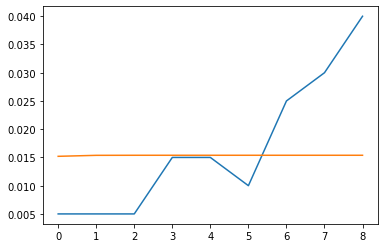

In [274]:
plt.plot(emp_fraction_exceed_lower_bound)
plt.plot(prob_lower_bound)


#     plt.plot(regret_avg)

In [110]:
a = np.arange(10, 200, 10)
a[-3:-1]

array([170, 180])

In [94]:
np.minimum(30, 20)

20

In [235]:
for i, j in enumerate([10, 20]):
    print(i,j)

0 10
1 20


In [269]:
a = np.zeros(5)
print(np.count_nonzero(a < 4))

5
